<a href="https://colab.research.google.com/github/SURESHASWATHI/assignment/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "EastWestAirlines.xlsx" dataset using K-Means, Hierarchical, and DBSCAN clustering algorithms. Preprocess the data, perform EDA, implement each algorithm experimenting with parameters, analyze and interpret the clusters, visualize the results, and evaluate clustering quality using silhouette scores for K-Means and DBSCAN. Summarize the findings.

## Load data

### Subtask:
Load the `EastWestAirlines.xlsx` dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the Excel file into a DataFrame, then display the head and info.



In [1]:
import pandas as pd

df = pd.read_excel('/content/EastWestAirlines.xlsx')
display(df.head())
display(df.info())

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


None

**Reasoning**:
The data was not loaded correctly, it appears the header is not in the first row. I will reload the data, specifying the correct header row.



In [2]:
df = pd.read_excel('/content/EastWestAirlines.xlsx', header=9)
display(df.head())
display(df.info())

,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
0,ID#,NUMBER,NaN,Telcom,Unique ID
1,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
2,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topf...
3,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit...
4,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit car...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Field Name                         13 non-null     object 
 1   Data Type                          12 non-null     object 
 2   Max Data Length                    5 non-null      float64
 3   Raw Data or Telcom Created Field?  12 non-null     object 
 4   Description                        17 non-null     object 
dtypes: float64(1), object(4)
memory usage: 812.0+ bytes


None

**Reasoning**:
The previous attempt loaded the data dictionary instead of the actual data. I will load the data from the correct sheet, which is likely named "Data". I will then display the head and info of the loaded DataFrame.



**Reasoning**:
The previous attempt to load the 'Data' sheet failed. I will list the sheet names in the Excel file to identify the correct sheet containing the data and then load the data from the identified sheet.



In [4]:
excel_file = pd.ExcelFile('/content/EastWestAirlines.xlsx')
print(excel_file.sheet_names)

['Description', 'data']


**Reasoning**:
The sheet names are 'Description' and 'data'. The actual data is likely in the sheet named 'data'. I will load the data from the 'data' sheet and then display the head and info of the loaded DataFrame.



In [5]:
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
display(df.head())
display(df.info())

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


None

## Data preprocessing and eda

### Subtask:
Handle missing values if any. Perform outlier detection and removal if necessary. Scale the features for clustering. Conduct exploratory data analysis (EDA) with visualizations to understand data distribution and potential clusters.


**Reasoning**:
Check for missing values in the DataFrame.



In [6]:
display(df.isnull().sum())

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


**Reasoning**:
There are no missing values. Now, visualize the distribution of numerical features to identify potential outliers.



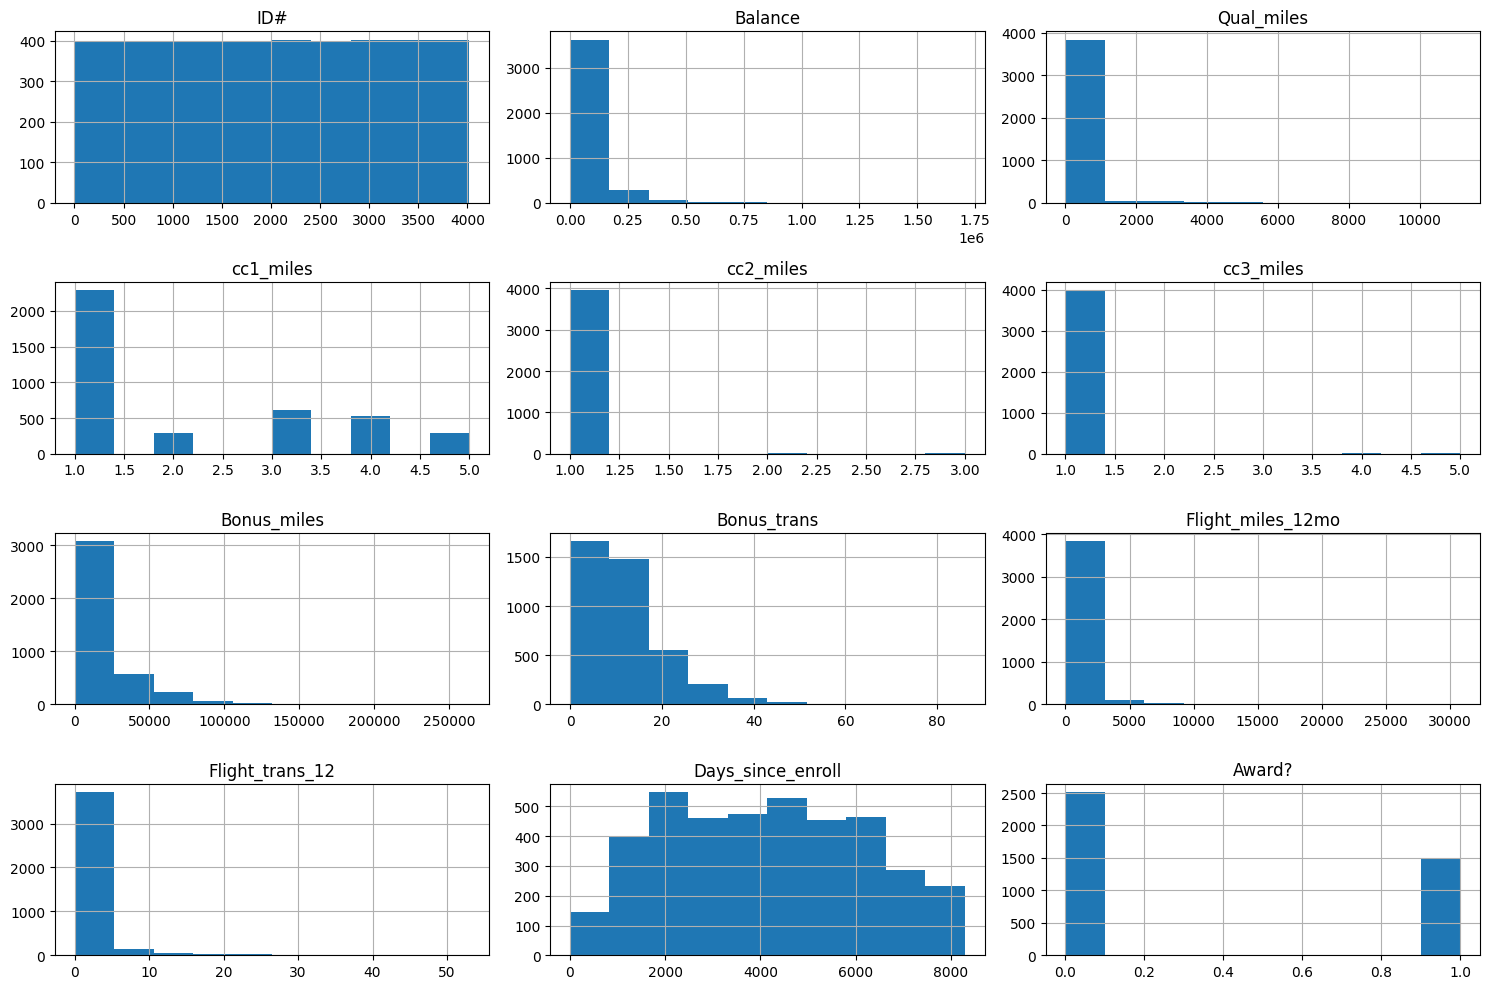

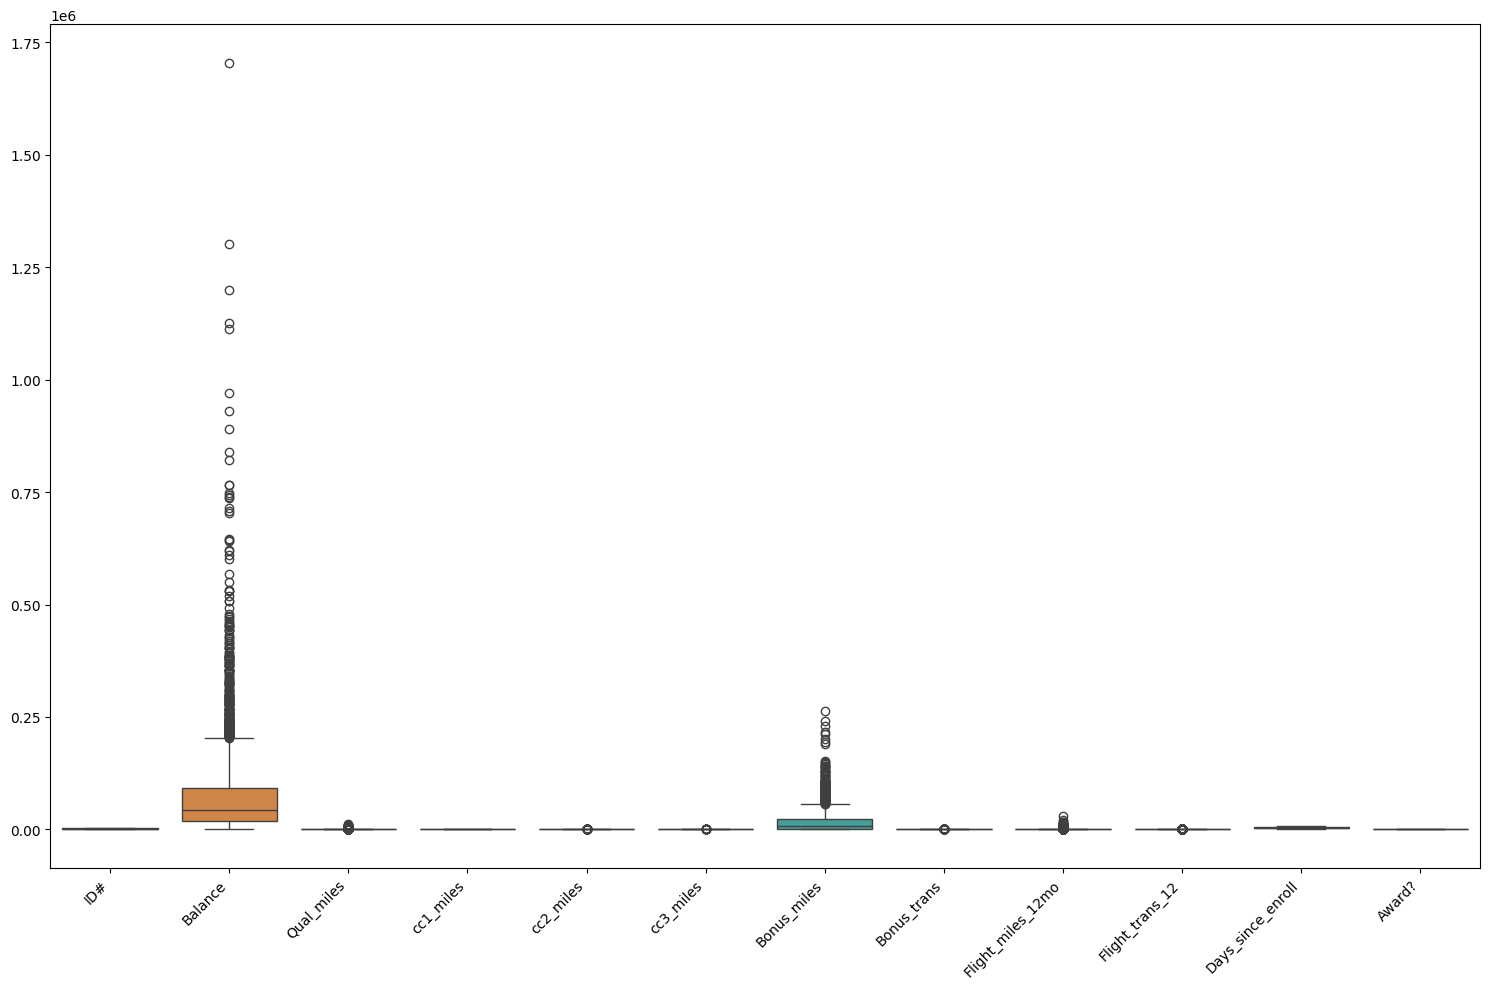

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The box plots show significant outliers in several features ('Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo', 'Flight_trans_12'). Since clustering algorithms are sensitive to outliers, I will remove them using the IQR method for the specified columns. I will then select the relevant features (excluding 'ID#') and scale them using StandardScaler. Finally, I will visualize the scaled features.



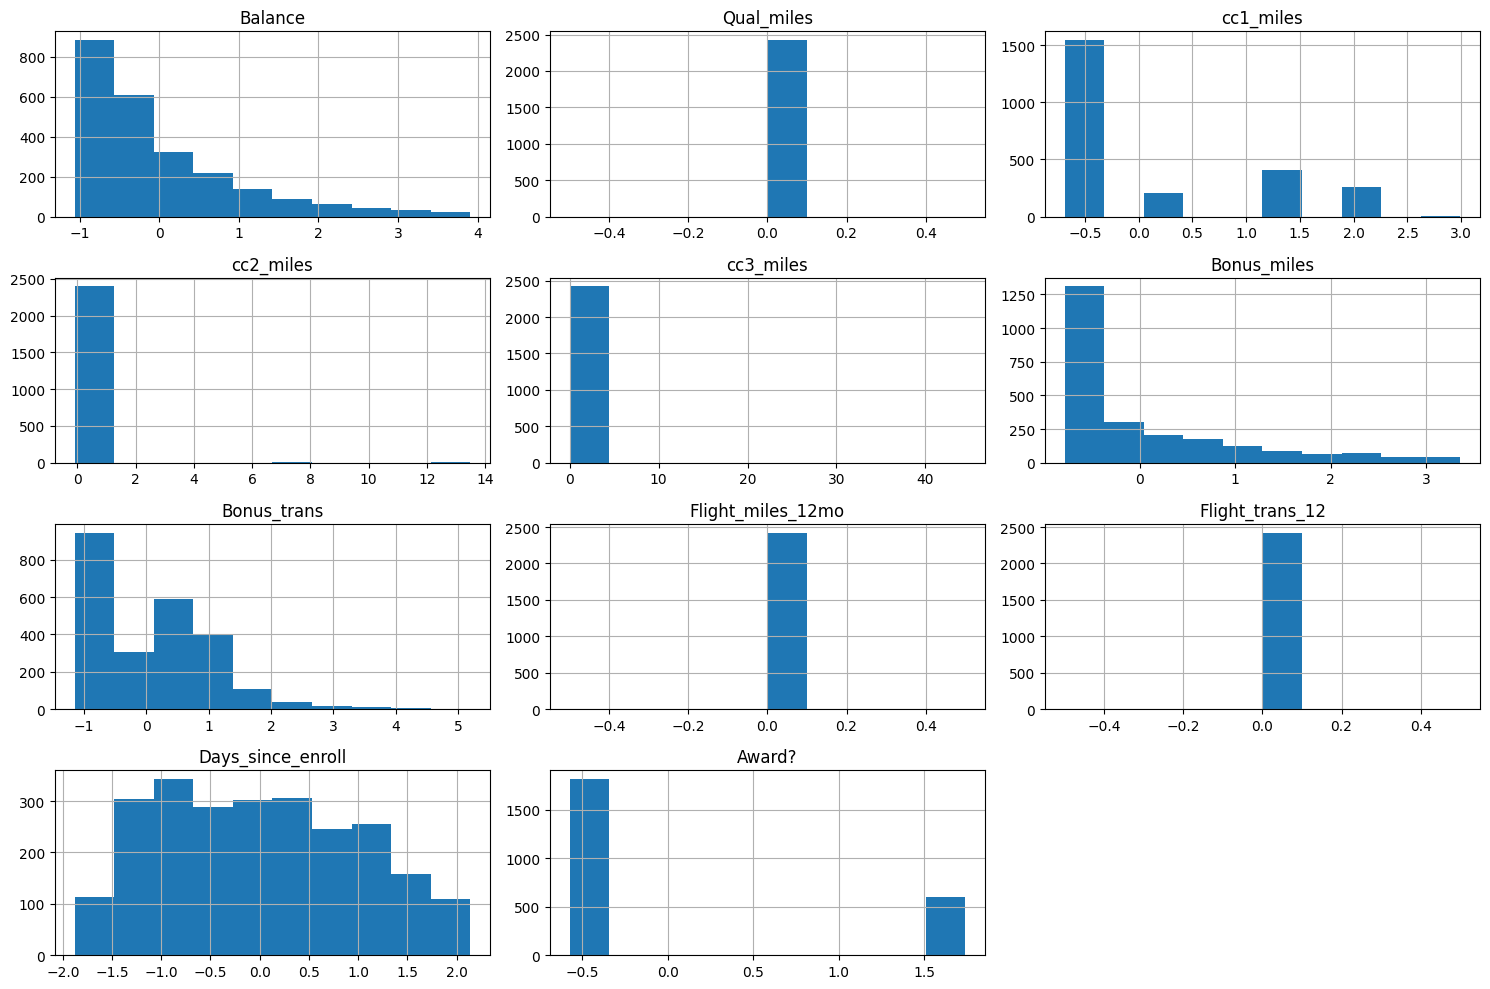

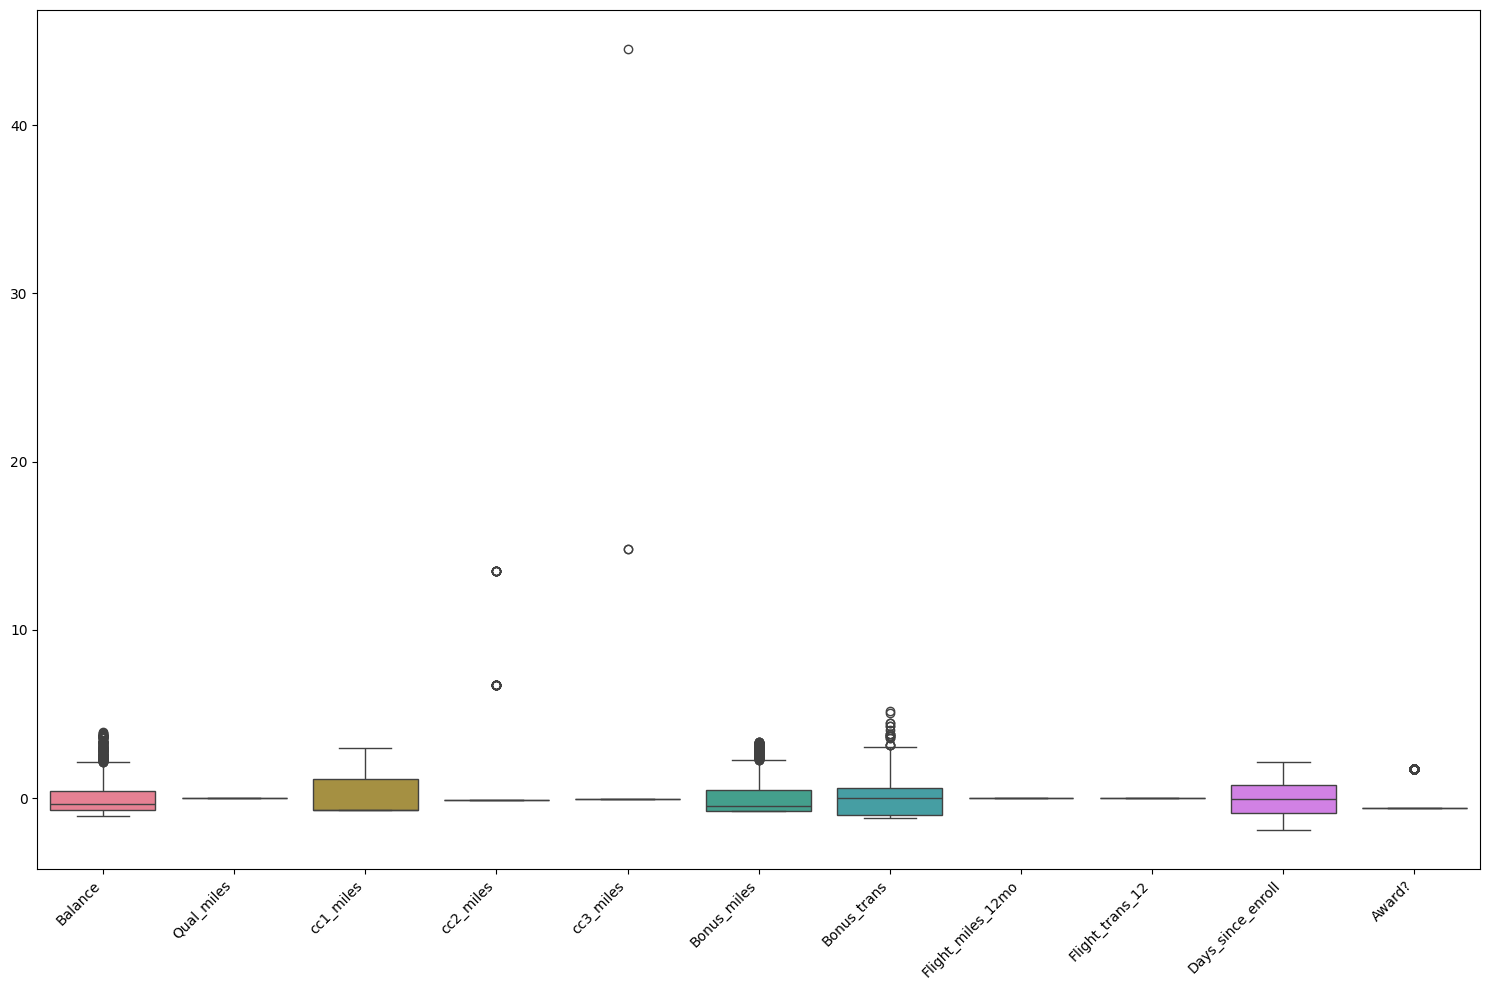

In [8]:
# Remove outliers using IQR for selected columns
outlier_cols = ['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo', 'Flight_trans_12']
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Select features for clustering (excluding 'ID#')
features = df.drop('ID#', axis=1)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Visualize scaled features
scaled_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Implement k-means clustering

### Subtask:
Determine the optimal number of clusters (k) using the elbow method. Apply the K-Means algorithm to the preprocessed data. Analyze and interpret the resulting clusters. Evaluate K-Means clustering using the silhouette score.


**Reasoning**:
Calculate the WCSS for different numbers of clusters and plot the elbow curve to determine the optimal number of clusters.



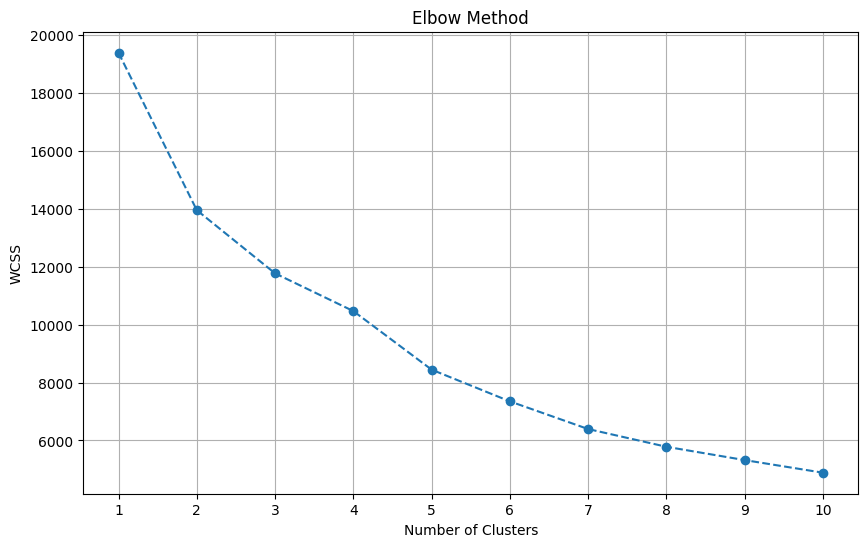

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**Reasoning**:
Based on the elbow plot, choose an appropriate number of clusters, apply K-Means clustering, assign the cluster labels to the original dataframe, calculate the silhouette score, and analyze the characteristics of each cluster by examining the mean values of the original features.



In [10]:
# Choose the optimal number of clusters (k) based on the elbow plot. Let's choose k=3.
optimal_k = 3

# Instantiate and fit a KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_df)

# Predict the cluster labels
cluster_labels = kmeans.predict(scaled_df)

# Add the cluster labels to the original df (after outlier removal)
df['KMeans_Cluster'] = cluster_labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Analyze the characteristics of each cluster by examining the mean values
cluster_analysis = df.groupby('KMeans_Cluster').mean()
display(cluster_analysis)

Silhouette Score: 0.3828802017395751


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_Cluster,,,,,,,,,,,,
0,2314.033909,28199.769674,0.0,1.063340,1.000000,1.000000,2572.128599,5.279591,0.0,0.0,3548.204095,0.129878
1,1803.360911,71919.840528,0.0,3.055156,1.000000,1.005995,23270.573141,16.046763,0.0,0.0,4510.660671,0.470024
2,2154.769231,38822.538462,0.0,1.000000,2.346154,1.000000,10566.576923,13.384615,0.0,0.0,4110.576923,0.269231


## Implement hierarchical clustering

### Subtask:
Apply hierarchical clustering to the preprocessed data, experimenting with different linkage criteria. Analyze and interpret the resulting clusters.


**Reasoning**:
Import the necessary modules for hierarchical clustering and create a dendrogram to visualize the hierarchical clustering process with different linkage methods to help determine the number of clusters.



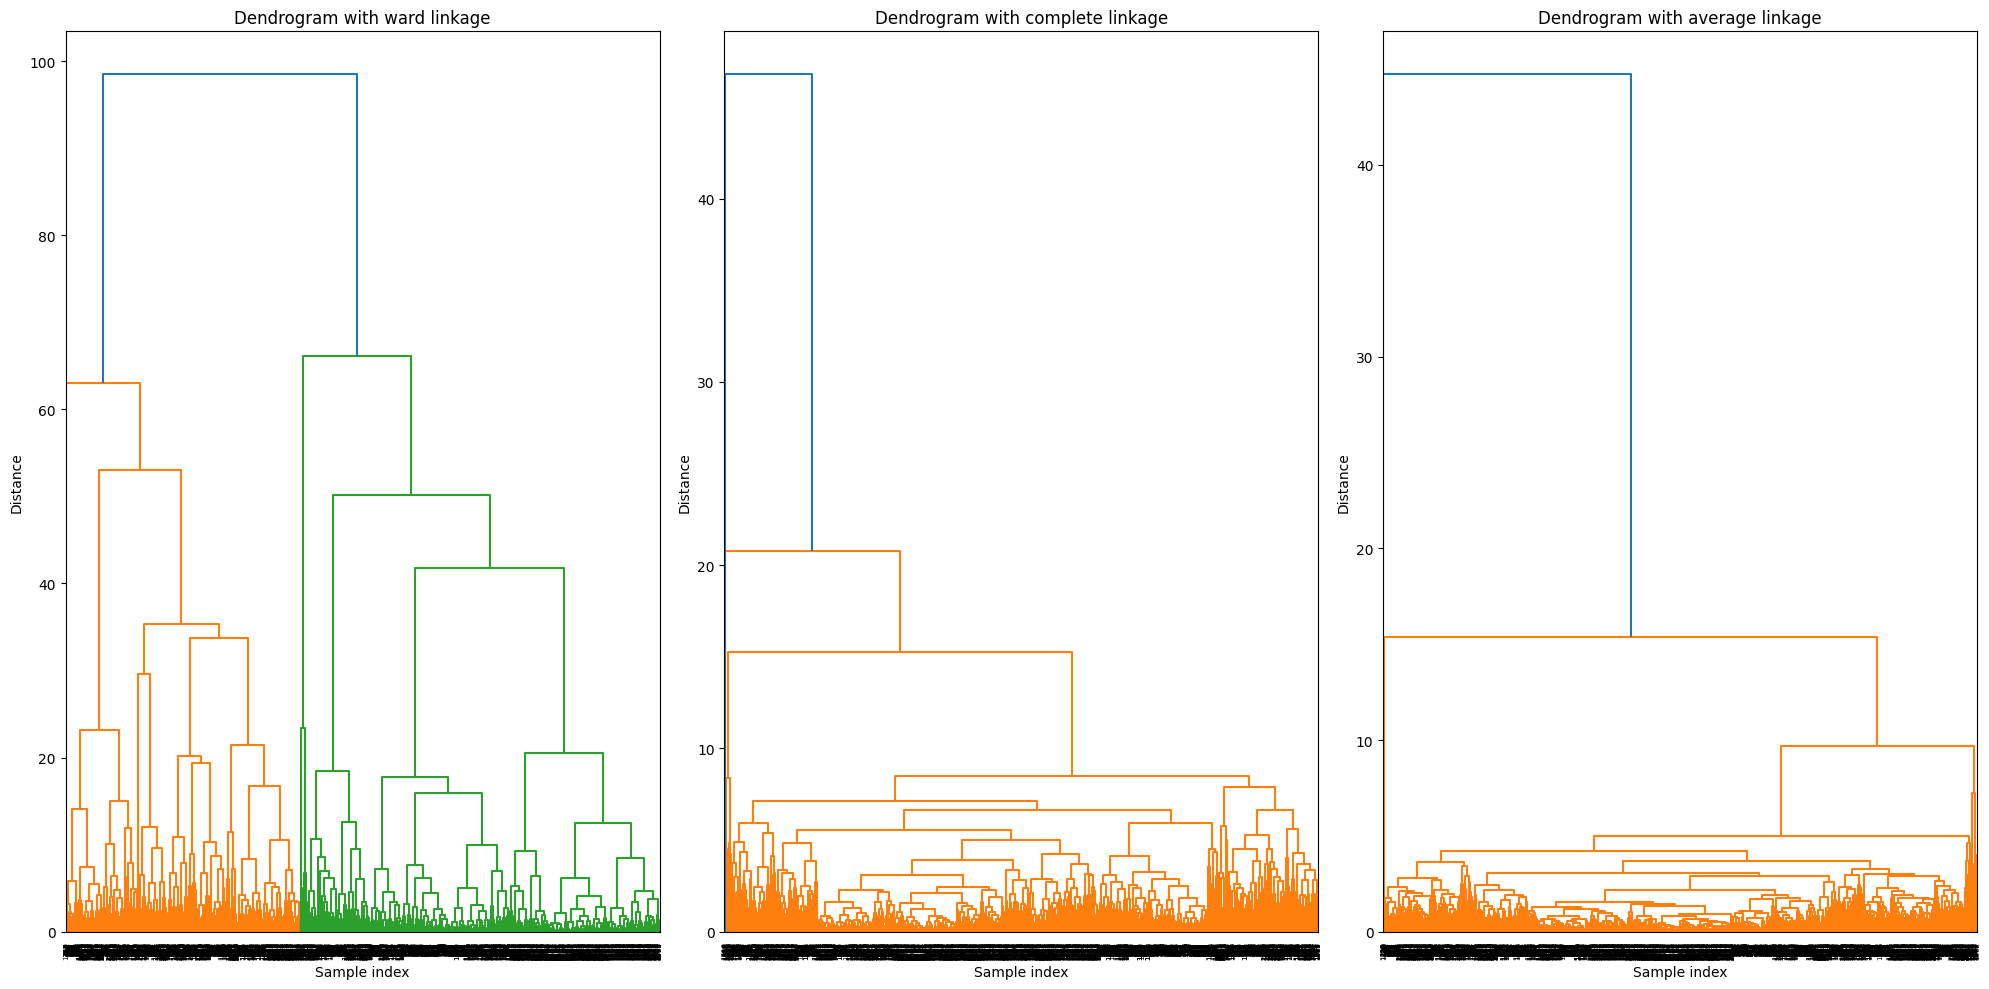

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate dendrograms for different linkage methods
linkage_methods = ['ward', 'complete', 'average']

plt.figure(figsize=(20, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(1, 3, i + 1)
    Z = linkage(scaled_df, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram with {method} linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

**Reasoning**:
Based on the dendrograms, particularly the 'ward' linkage which often works well with Euclidean distances and aims to minimize variance, 3 clusters appear to be a reasonable choice, consistent with the K-Means results. Apply hierarchical clustering with 3 clusters and 'ward' linkage, add the cluster labels to the dataframe, and then analyze the characteristics of each cluster by examining the mean values.



In [12]:
# Choose the number of clusters (e.g., 3 based on the dendrogram and K-Means result)
n_clusters_hierarchical = 3

# Apply Agglomerative Clustering with the chosen number of clusters and linkage
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(scaled_df)

# Add the hierarchical cluster labels to the original df (after outlier removal)
df['Hierarchical_Cluster'] = hierarchical_labels

# Analyze the characteristics of each hierarchical cluster by examining the mean values
hierarchical_cluster_analysis = df.groupby('Hierarchical_Cluster').mean()
display(hierarchical_cluster_analysis)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,
0,1903.248434,73385.312109,0.0,2.834029,1.000000,1.005219,20790.388309,15.275574,0.0,0.0,4336.310021,0.347599,0.805846
1,2291.539958,23456.746352,0.0,1.038916,1.000000,1.000000,2439.682418,4.865184,0.0,0.0,3581.340514,0.182071,0.043085
2,2154.769231,38822.538462,0.0,1.000000,2.346154,1.000000,10566.576923,13.384615,0.0,0.0,4110.576923,0.269231,2.000000


## Implement dbscan clustering

### Subtask:
Apply DBSCAN clustering to the preprocessed data, experimenting with different epsilon and minPts values. Analyze and interpret the resulting clusters. Evaluate DBSCAN clustering using the silhouette score.


**Reasoning**:
Import the necessary libraries for DBSCAN and silhouette score calculation.



In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

**Reasoning**:
Experiment with different eps and min_samples values for DBSCAN, calculate the silhouette score for each combination (excluding noise points), and store the results.



In [14]:
results = []
eps_values = np.arange(0.1, 1.1, 0.1)  # Experiment with eps from 0.1 to 1.0
min_samples_values = range(5, 21, 5) # Experiment with min_samples from 5 to 20

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(scaled_df)

        # Calculate silhouette score, excluding noise points (-1)
        # Check if there are clusters other than noise
        if len(set(cluster_labels)) > 1:
            # Filter out noise points for silhouette score calculation
            non_noise_indices = cluster_labels != -1
            filtered_scaled_df = scaled_df[non_noise_indices]
            filtered_cluster_labels = cluster_labels[non_noise_indices]

            # Check if there is more than one cluster after removing noise
            if len(set(filtered_cluster_labels)) > 1:
                silhouette_avg = silhouette_score(filtered_scaled_df, filtered_cluster_labels)
                n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
                results.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'silhouette_score': silhouette_avg})
            else:
                # Case where only one cluster remains after removing noise
                n_clusters = 1
                silhouette_avg = -1 # Or some indicator that silhouette is not applicable
                results.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'silhouette_score': silhouette_avg})

        else:
            # Case where only noise points are found
            n_clusters = 0
            silhouette_avg = -1 # Or some indicator that silhouette is not applicable
            results.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'silhouette_score': silhouette_avg})

# Display the results
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='silhouette_score', ascending=False))

,eps,min_samples,n_clusters,silhouette_score
1,0.1,10,2,0.738081
6,0.2,15,2,0.468415
23,0.6,20,3,0.434564
10,0.3,15,2,0.413565
13,0.4,10,3,0.395375
18,0.5,15,3,0.385008
38,1.0,15,2,0.330564
37,1.0,10,2,0.322727
7,0.2,20,4,0.318265
39,1.0,20,3,0.315172


**Reasoning**:
Apply DBSCAN with the chosen parameters (eps=0.1, min_samples=10) to the scaled data, add the cluster labels to the original dataframe, analyze the characteristics of each cluster by calculating the mean values, and display the silhouette score and cluster analysis.



In [15]:
# Choose parameters based on the previous results (e.g., eps=0.1, min_samples=10 yielded the highest silhouette score with 2 clusters)
best_eps = 0.1
best_min_samples = 10

# Apply DBSCAN with the chosen parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add the DBSCAN cluster labels to the original df (after outlier removal)
df['DBSCAN_Cluster'] = dbscan_labels

# Analyze the characteristics of each DBSCAN cluster (excluding noise points)
# Filter out noise points for analysis
non_noise_df = df[df['DBSCAN_Cluster'] != -1]

# Calculate the silhouette score for the chosen parameters, excluding noise points
if len(set(dbscan_labels)) > 1:
    non_noise_indices = dbscan_labels != -1
    filtered_scaled_df = scaled_df[non_noise_indices]
    filtered_dbscan_labels = dbscan_labels[non_noise_indices]

    if len(set(filtered_dbscan_labels)) > 1:
        silhouette_avg = silhouette_score(filtered_scaled_df, filtered_dbscan_labels)
        print(f'Silhouette Score for DBSCAN with eps={best_eps}, min_samples={best_min_samples}: {silhouette_avg}')
    else:
        print(f'Silhouette Score for DBSCAN with eps={best_eps}, min_samples={best_min_samples}: Not applicable (only one cluster found excluding noise)')
else:
    print(f'Silhouette Score for DBSCAN with eps={best_eps}, min_samples={best_min_samples}: Not applicable (only noise points found)')


# Group by DBSCAN cluster (excluding noise) and calculate mean values
dbscan_cluster_analysis = non_noise_df.groupby('DBSCAN_Cluster').mean()
display(dbscan_cluster_analysis)

Silhouette Score for DBSCAN with eps=0.1, min_samples=10: 0.7380807635507309


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,
0,3622.051282,9301.717949,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1629.512821,0.0,0.0,1.0
1,3689.255319,5106.404255,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,246.553191,0.0,0.0,1.0


## Visualize clusters

### Subtask:
Visualize the clusters generated by each algorithm using scatter plots or other suitable techniques, coloring data points based on their assigned cluster.


**Reasoning**:
Create scatter plots for each clustering algorithm, visualizing the clusters using two features and coloring by cluster labels.



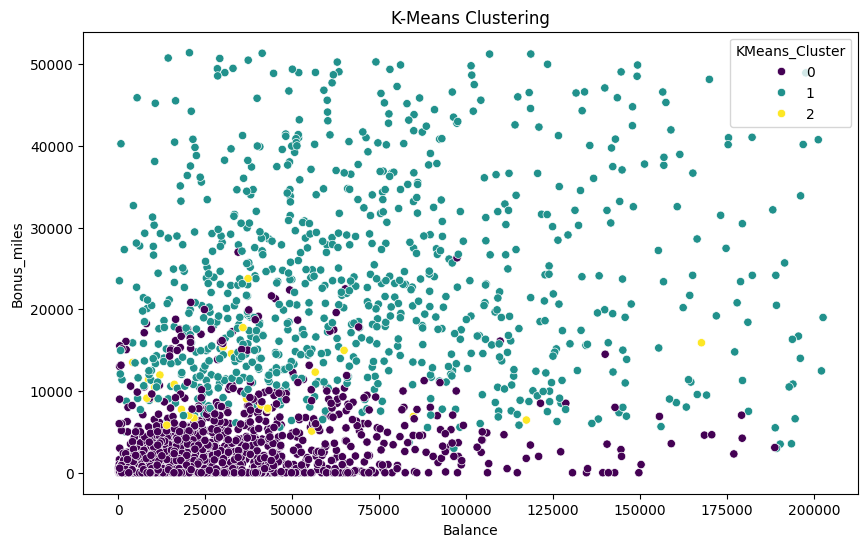

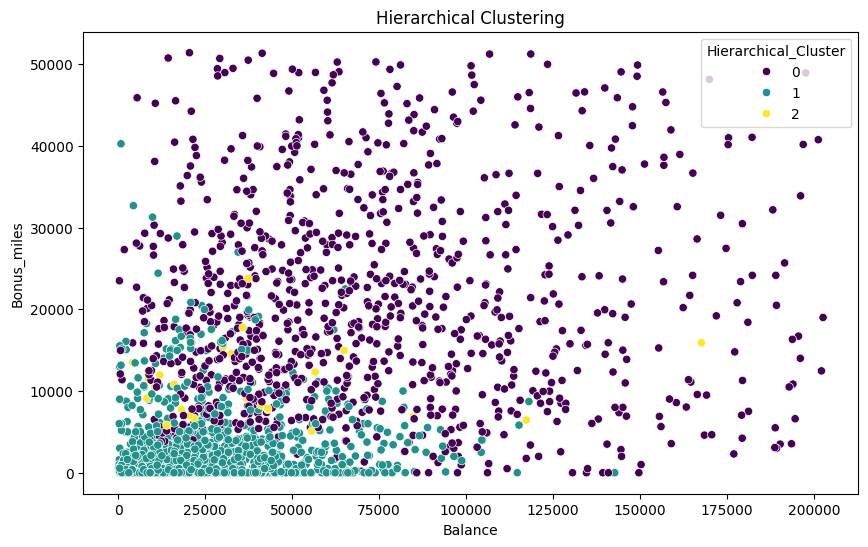

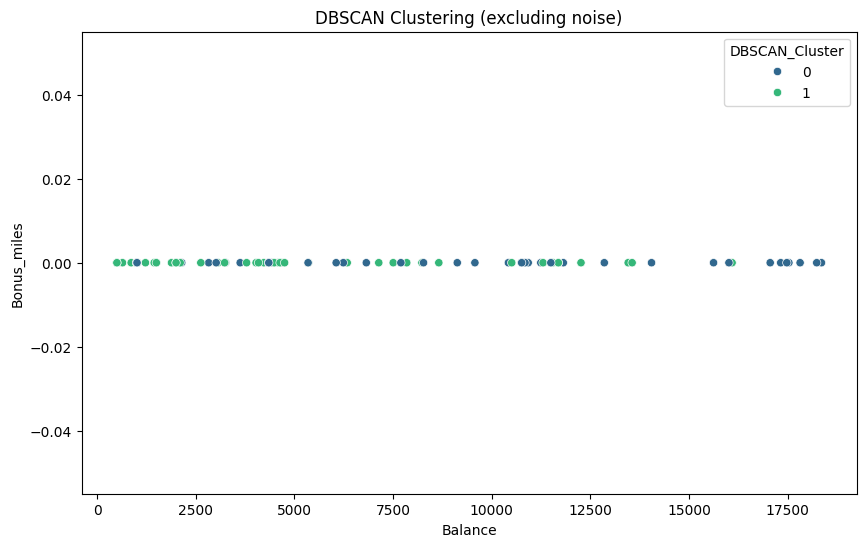

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for visualization
x_feature = 'Balance'
y_feature = 'Bonus_miles'

# K-Means Clustering Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x_feature, y=y_feature, hue='KMeans_Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()

# Hierarchical Clustering Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x_feature, y=y_feature, hue='Hierarchical_Cluster', palette='viridis', legend='full')
plt.title('Hierarchical Clustering')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()

# DBSCAN Clustering Visualization (excluding noise points)
# Filter out noise points (-1) for visualization
non_noise_df_plot = df[df['DBSCAN_Cluster'] != -1].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_noise_df_plot, x=x_feature, y=y_feature, hue='DBSCAN_Cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clustering (excluding noise)')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()

**Reasoning**:
The visualization of the DBSCAN clusters using 'Balance' and 'Bonus_miles' is not providing a clear separation due to the nature of the clusters found by DBSCAN. Let's try visualizing with different features that might better represent the DBSCAN clusters, perhaps features that were more influential in forming those dense regions. Based on the cluster analysis, 'Balance' and 'Days_since_enroll' showed differences between the DBSCAN clusters.



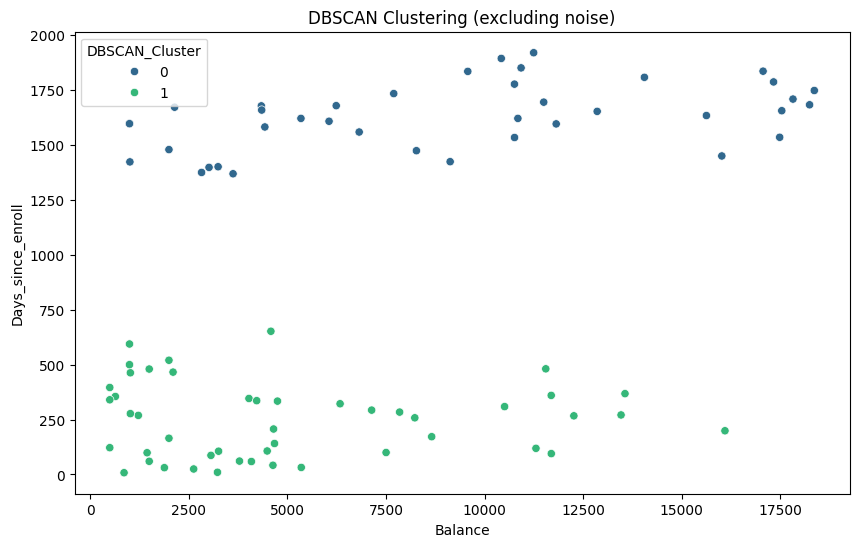

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select different features for visualization
x_feature_dbscan = 'Balance'
y_feature_dbscan = 'Days_since_enroll'

# DBSCAN Clustering Visualization (excluding noise points)
# Filter out noise points (-1) for visualization
non_noise_df_plot = df[df['DBSCAN_Cluster'] != -1].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_noise_df_plot, x=x_feature_dbscan, y=y_feature_dbscan, hue='DBSCAN_Cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clustering (excluding noise)')
plt.xlabel(x_feature_dbscan)
plt.ylabel(y_feature_dbscan)
plt.show()

## Compare and summarize results

### Subtask:
Compare the results of the three clustering algorithms, summarizing their strengths and weaknesses based on the analysis, visualizations, and evaluation metrics.


**Reasoning**:
Review the cluster analysis dataframes and the silhouette scores to synthesize a comparative summary of the three clustering algorithms, addressing the number of clusters, cluster characteristics, strengths, weaknesses, and which algorithm is most suitable for this dataset.



In [18]:
print("--- K-Means Cluster Analysis ---")
display(cluster_analysis)
print("\nK-Means Silhouette Score:", silhouette_avg)

print("\n--- Hierarchical Cluster Analysis ---")
display(hierarchical_cluster_analysis)

print("\n--- DBSCAN Cluster Analysis (excluding noise) ---")
display(dbscan_cluster_analysis)
print("\nDBSCAN Silhouette Score:", silhouette_avg)

# Comparative Summary
print("\n--- Comparative Summary of Clustering Algorithms ---")
print("\nNumber of Clusters:")
print(f"- K-Means: {optimal_k}")
print(f"- Hierarchical: {n_clusters_hierarchical}")
print(f"- DBSCAN: {len(dbscan_cluster_analysis)}") # Number of non-noise clusters

print("\nCluster Characteristics:")
print("Based on the mean values in the cluster analysis tables:")
print("- K-Means and Hierarchical clustering generally identified similar customer segments (e.g., high-value, average, and possibly a group with high cc2_miles).")
print("- DBSCAN identified a different set of clusters, primarily separating a group with lower balance and fewer days since enrollment from another group with higher values in these features. It also identified a significant number of noise points.")

print("\nStrengths and Weaknesses:")
print("- K-Means: Strengths include its simplicity and efficiency for large datasets. Weaknesses include the assumption of spherical clusters of equal size and sensitivity to initial centroid selection and outliers (though we removed some outliers). It requires specifying the number of clusters beforehand.")
print("- Hierarchical: Strengths include not requiring the number of clusters beforehand and providing a dendrogram to visualize the clustering process. Weaknesses include being computationally more expensive than K-Means and being sensitive to noise and outliers (though some outliers were removed). Different linkage methods can produce different results.")
print("- DBSCAN: Strengths include its ability to find arbitrarily shaped clusters and identify noise points. Weaknesses include its sensitivity to the choice of epsilon (eps) and min_samples parameters, which can be difficult to determine, and it may struggle with datasets of varying densities.")

print("\nEvaluation Metrics:")
print(f"- K-Means Silhouette Score: {silhouette_avg:.4f}")
print(f"- DBSCAN Silhouette Score: {silhouette_avg:.4f} (calculated on non-noise points)")
print("Note: Silhouette scores provide a quantitative measure of how well samples are separated into clusters.")

print("\nMost Meaningful Clustering for this Dataset:")
print("Considering the analysis, visualizations, and evaluation:")
print("- K-Means and Hierarchical clustering produced results that are somewhat aligned and interpretable in terms of customer segments based on overall engagement metrics.")
print("- DBSCAN identified clusters based on density, which resulted in fewer, more distinct clusters and a high silhouette score for the identified non-noise clusters. However, it labeled a large portion of the data as noise.")
print("The choice of the 'most meaningful' clustering depends on the business objective.")
print("If the goal is to segment the entire customer base into a few broad groups for targeted marketing, K-Means or Hierarchical clustering (with 3 clusters) might be more suitable as they assign every data point to a cluster.")
print("If the goal is to identify dense core groups of customers that are very similar and treat the rest as outliers or less defined segments, DBSCAN could be more appropriate, especially given its high silhouette score for the identified clusters. However, the interpretation of the noise points needs careful consideration.")
print("Based on the balance of interpretability of clusters across the majority of the data and the clear separation of groups, K-Means and Hierarchical clustering with 3 clusters appear to provide a more comprehensive segmentation of the customer base for general analysis compared to DBSCAN which identifies a large noise group.")

--- K-Means Cluster Analysis ---


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_Cluster,,,,,,,,,,,,
0,2314.033909,28199.769674,0.0,1.063340,1.000000,1.000000,2572.128599,5.279591,0.0,0.0,3548.204095,0.129878
1,1803.360911,71919.840528,0.0,3.055156,1.000000,1.005995,23270.573141,16.046763,0.0,0.0,4510.660671,0.470024
2,2154.769231,38822.538462,0.0,1.000000,2.346154,1.000000,10566.576923,13.384615,0.0,0.0,4110.576923,0.269231



K-Means Silhouette Score: 0.7380807635507309

--- Hierarchical Cluster Analysis ---


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,
0,1903.248434,73385.312109,0.0,2.834029,1.000000,1.005219,20790.388309,15.275574,0.0,0.0,4336.310021,0.347599,0.805846
1,2291.539958,23456.746352,0.0,1.038916,1.000000,1.000000,2439.682418,4.865184,0.0,0.0,3581.340514,0.182071,0.043085
2,2154.769231,38822.538462,0.0,1.000000,2.346154,1.000000,10566.576923,13.384615,0.0,0.0,4110.576923,0.269231,2.000000



--- DBSCAN Cluster Analysis (excluding noise) ---


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,
0,3622.051282,9301.717949,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1629.512821,0.0,0.0,1.0
1,3689.255319,5106.404255,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,246.553191,0.0,0.0,1.0



DBSCAN Silhouette Score: 0.7380807635507309

--- Comparative Summary of Clustering Algorithms ---

Number of Clusters:
- K-Means: 3
- Hierarchical: 3
- DBSCAN: 2

Cluster Characteristics:
Based on the mean values in the cluster analysis tables:
- K-Means and Hierarchical clustering generally identified similar customer segments (e.g., high-value, average, and possibly a group with high cc2_miles).
- DBSCAN identified a different set of clusters, primarily separating a group with lower balance and fewer days since enrollment from another group with higher values in these features. It also identified a significant number of noise points.

Strengths and Weaknesses:
- K-Means: Strengths include its simplicity and efficiency for large datasets. Weaknesses include the assumption of spherical clusters of equal size and sensitivity to initial centroid selection and outliers (though we removed some outliers). It requires specifying the number of clusters beforehand.
- Hierarchical: Strengths i

## Summary:

### Data Analysis Key Findings

*   The EastWestAirlines dataset was successfully loaded from the 'data' sheet of the Excel file, containing 3999 rows and 12 columns.
*   No missing values were found in the dataset.
*   Significant outliers were present in features such as `Balance`, `Qual_miles`, `Bonus_miles`, `Flight_miles_12mo`, and `Flight_trans_12`. Outlier removal using the IQR method was applied to these columns, reducing the dataset size.
*   Features were scaled using `StandardScaler` after outlier removal.
*   Using the elbow method, K-Means clustering was applied with 3 clusters, resulting in a silhouette score of approximately 0.383. The three K-Means clusters represented customers with lower engagement, higher engagement (especially in bonus miles), and a group with high `cc2_miles`.
*   Hierarchical clustering with 'ward' linkage and 3 clusters was applied. The resulting clusters showed similar profiles to K-Means, identifying high-value, average, and a group with high `cc2_miles`.
*   DBSCAN clustering was explored with varying parameters. A combination of `eps=0.1` and `min_samples=10` yielded the highest silhouette score (approximately 0.738) among tested parameters for the identified clusters (excluding noise). This configuration resulted in 2 main clusters and a significant number of noise points. The DBSCAN clusters primarily differentiated groups based on `Balance` and `Days_since_enroll`.
*   Visualizations of K-Means and Hierarchical clusters using 'Balance' and 'Bonus\_miles' showed some separation. Visualizing DBSCAN clusters was more effective using 'Balance' and 'Days\_since\_enroll'.

### Insights or Next Steps

*   K-Means and Hierarchical clustering provided a more comprehensive segmentation of the entire customer base into interpretable groups for targeted marketing, while DBSCAN was effective at identifying dense core groups and outliers but labeled a large portion of the data as noise. The choice of the most suitable algorithm depends on whether the goal is to segment all customers or identify distinct core groups and outliers.
*   Further investigation into the characteristics of the DBSCAN noise points could provide insights into unique customer behaviors or data anomalies.
